In [ ]:
# jdwang@asia.edu.tw Jing-Doo Wang
# 2020/11/16

In [1]:
import pandas as pd

SrcDir = "../SRC/"
SrcFile = 'part-r-00000_TDCS_201611_201910_03F1779S_03F2129S_G8_Key_TotalTime_TimeIntervals_TFCFLength_ClassFrequency_1_0'
SrcLocation = SrcDir +SrcFile

TDCS_MRP_data = pd.read_csv(SrcLocation,sep='\#\#|\t', header=None)
TDCS_MRP_data.columns = ["Hour","TotalTravelTime","TravelTimeIntervals","TF","DF","NumOfGantries","ClassFrequencyDistribution"]
TDCS_MRP_data

C:\Users\jdwang\anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


Hour  TotalTravelTime TravelTimeIntervals  TF  DF  NumOfGantries  \
0          0               13      -3-3-2-2-1-1-1   2   2              8   
1          0               13      -3-3-2-2-1-1-1   2   2              8   
2          0               13      -3-3-2-2-1-1-1   2   2              8   
3          0               13      -3-3-2-2-1-1-1   4   4              8   
4          0               13      -3-3-2-2-1-1-1   3   3              8   
...      ...              ...                 ...  ..  ..            ...   
220642    23               33     -4-5-2-4-1-1-16   2   2              8   
220643    23               35     -19-5-3-4-1-1-2   3   3              8   
220644    23               39     -4-5-2-25-1-1-1   2   2              8   
220645    23               41     -26-5-2-4-1-1-2   2   2              8   
220646    23               42     -25-5-3-5-1-1-2   2   2              8   

                               ClassFrequencyDistribution  
0          (2018-01-23_Tue_31#1#1)(2018-07-20_Fri_31#1#1)  
1          (2018-01-01_Mon_31#1#1)(2018-12-24_Mon_31#1#1)  
2          (2017-07-24_Mon_31#1#1)(2018-04-01_Sun_31#1#1)  
3       (2017-03-22_Wed_31#1#1)(2018-05-28_Mon_31#1#1)...  
4       (2017-08-05_Sat_31#1#1)(2017-12-30_Sat_31#1#1)...  
...                                                   ...  
220642     (2017-05-27_Sat_31#1#1)(2019-02-07_Thu_31#1#1)  
220643  (2018-11-14_Wed_31#1#1)(2018-11-14_Wed_32#1#1)...  
220644     (2017-12-15_Fri_31#1#1)(2018-01-20_Sat_31#1#1)  
220645     (2016-12-04_Sun_31#1#1)(2018-04-08_Sun_32#1#1)  
220646     (2017-05-02_Tue_41#1#1)(2018-06-18_Mon_31#1#1)  

[220647 rows x 7 columns]

In [2]:
TargetColumn1 = 'TravelTimeIntervals'
#TargetColumn2 = 'TravelTimeIntervals'
TargetValue = '-4-5-2-4-1-1-2' # => TotalTravelTime = 19

OneTemp_ClassFrequencyDistribution = TDCS_MRP_data[(TDCS_MRP_data[TargetColumn1]== TargetValue)]
OneTemp_ClassFrequencyDistribution = OneTemp_ClassFrequencyDistribution[['Hour','ClassFrequencyDistribution']]
OneTemp_ClassFrequencyDistribution = OneTemp_ClassFrequencyDistribution.reset_index(drop=True)
#OneTemp_ClassFrequencyDistribution

'''
Hour_Date_TF_Distribution = {}
for i in range(24):
    Hour_Date_TF_Distribution[str(i)] = {}
'''

Hour_Weekday_TF_Distribution = {}
for i in range(24):
    Hour_Weekday_TF_Distribution[str(i)] = {}

for OneIndex, OneRecord in OneTemp_ClassFrequencyDistribution.iterrows():
   
    TargetHour = str(OneRecord[0])
    #print(TargetHour)
    #print(OneClassFrequencyDistribution.tolist()[1])
    # (2017-01-24_Tue_31#1#1)(2017-10-03_Tue_31#1#1).
    Temp = OneRecord[1].split(')')      
    #print(Temp)
    for OneItem in Temp:
        if (OneItem != ''):
            #(2017-01-24_Tue_31#1#1
            #(2018-09-28_Fri_5#1#1)
            TF_DF_Info = OneItem.split('#')
            #print(TF_DF_Info)
            TF = TF_DF_Info[1]
            
            DateVT_Info = TF_DF_Info[0].split('_') #(2018-09-28_Fri_5
            Date = DateVT_Info[0][1:]
            Weekday = DateVT_Info[1]
            VehicleType = DateVT_Info[2]
            # Extract Date Information
            Year = DateVT_Info[0][1:5]
            Month = DateVT_Info[0][6:8]
            Day = DateVT_Info[0][9:11]            
            #print(TargetHour[0], Date, Year, Month, Day, Weekday, VehicleType, TF )
            '''
            if Date in Hour_Date_TF_Distribution[TargetHour]:
                Hour_Date_TF_Distribution[TargetHour][Date] = Hour_Date_TF_Distribution[TargetHour][Date] + int(TF)
            else:
                Hour_Date_TF_Distribution[TargetHour][Date] = int(TF)
            '''
            if Weekday in Hour_Weekday_TF_Distribution[TargetHour]:
                Hour_Weekday_TF_Distribution[TargetHour][Weekday] = Hour_Weekday_TF_Distribution[TargetHour][Weekday] + int(TF)
            else:
                Hour_Weekday_TF_Distribution[TargetHour][Weekday] = int(TF)
                                
#Hour_Date_TF_Distribution
Hour_Weekday_TF_Distribution

{'0': {'Tue': 567,
  'Sat': 1235,
  'Mon': 607,
  'Fri': 2117,
  'Wed': 786,
  'Sun': 963,
  'Thu': 824},
 '1': {'Fri': 1015,
  'Tue': 455,
  'Thu': 629,
  'Sat': 1235,
  'Sun': 757,
  'Mon': 547,
  'Wed': 528},
 '2': {'Fri': 557,
  'Sat': 1105,
  'Thu': 528,
  'Sun': 676,
  'Mon': 407,
  'Tue': 374,
  'Wed': 375},
 '3': {'Sat': 1007,
  'Tue': 317,
  'Sun': 654,
  'Thu': 470,
  'Fri': 477,
  'Mon': 393,
  'Wed': 312},
 '4': {'Sat': 1513,
  'Tue': 422,
  'Thu': 689,
  'Fri': 657,
  'Sun': 898,
  'Mon': 578,
  'Wed': 503},
 '5': {'Mon': 1180,
  'Tue': 932,
  'Sat': 3115,
  'Fri': 1342,
  'Sun': 1871,
  'Wed': 1040,
  'Thu': 1373},
 '6': {'Wed': 1998,
  'Thu': 2948,
  'Sun': 4473,
  'Mon': 3197,
  'Sat': 7896,
  'Tue': 2217,
  'Fri': 3204},
 '7': {'Tue': 4699,
  'Wed': 4404,
  'Sat': 15062,
  'Sun': 8583,
  'Fri': 6112,
  'Mon': 6235,
  'Thu': 4645},
 '8': {'Tue': 5840,
  'Fri': 6953,
  'Sat': 13701,
  'Sun': 11259,
  'Mon': 6843,
  'Wed': 6035,
  'Thu': 5716},
 '9': {'Tue': 6512,
  'Sun'

In [3]:
!pip install plotly.express

  Using cached plotly_express-0.4.1-py2.py3-none-any.whl (2.9 kB)


In [4]:
import plotly.express as px
import plotly.express as px
df = px.data.gapminder().query("country=='Brazil'")
fig = px.line_3d(df, x="gdpPercap", y="pop", z="year")
fig.show()

In [5]:
df

country continent  year  lifeExp        pop    gdpPercap iso_alpha  \
168  Brazil  Americas  1952   50.917   56602560  2108.944355       BRA   
169  Brazil  Americas  1957   53.285   65551171  2487.365989       BRA   
170  Brazil  Americas  1962   55.665   76039390  3336.585802       BRA   
171  Brazil  Americas  1967   57.632   88049823  3429.864357       BRA   
172  Brazil  Americas  1972   59.504  100840058  4985.711467       BRA   
173  Brazil  Americas  1977   61.489  114313951  6660.118654       BRA   
174  Brazil  Americas  1982   63.336  128962939  7030.835878       BRA   
175  Brazil  Americas  1987   65.205  142938076  7807.095818       BRA   
176  Brazil  Americas  1992   67.057  155975974  6950.283021       BRA   
177  Brazil  Americas  1997   69.388  168546719  7957.980824       BRA   
178  Brazil  Americas  2002   71.006  179914212  8131.212843       BRA   
179  Brazil  Americas  2007   72.390  190010647  9065.800825       BRA   

     iso_num  
168       76  
169       76  
170       76  
171       76  
172       76  
173       76  
174       76  
175       76  
176       76  
177       76  
178       76  
179       76

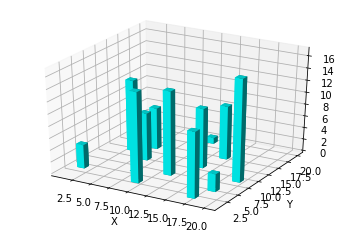

In [20]:
#https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import random

fig = plt.figure()
ax = plt.axes(projection="3d")

num_bars = 15
x_pos = random.sample(range(20), num_bars)
y_pos = random.sample(range(20), num_bars)
z_pos = [0] * num_bars
x_size = np.ones(num_bars)
y_size = np.ones(num_bars)
z_size = random.sample(range(20), num_bars)

ax.bar3d(x_pos, y_pos, z_pos, x_size, y_size, z_size, color='aqua')
plt.xlabel('X')
plt.ylabel('Y')
#plt.zlabel('Z')
plt.show()

In [21]:
num_bars = 15
np.ones(num_bars)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [22]:
z_size = random.sample(range(20), num_bars)
z_size

[9, 16, 3, 12, 6, 8, 15, 10, 19, 5, 17, 4, 18, 0, 11]

In [23]:
z_pos = [0] * num_bars
z_pos

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

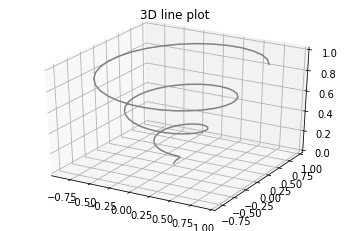

In [30]:
#https://www.tutorialspoint.com/matplotlib/matplotlib_three_dimensional_plotting.htm
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
z = np.linspace(0, 1, 100)
x = z * np.sin(20 * z)
y = z * np.cos(20 * z)
ax.plot3D(x, y, z, 'gray')
ax.set_title('3D line plot')
plt.show()

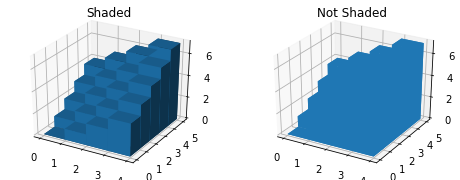

In [31]:
#https://matplotlib.org/3.3.2/gallery/mplot3d/3d_bars.html
import numpy as np
import matplotlib.pyplot as plt


# setup the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# fake data
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')

plt.show()

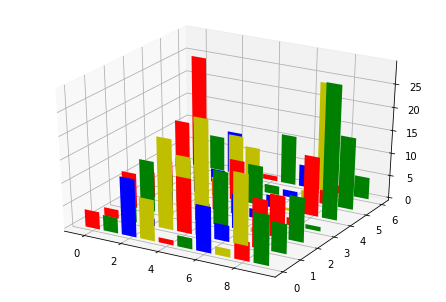

In [32]:
#https://blog.csdn.net/dahunihao/article/details/77833877

# 载入模块
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
 
# 创建 3D 图形对象
fig = plt.figure()
ax = Axes3D(fig)
 
# 生成数据并绘图
x = [0, 1, 2, 3, 4, 5, 6]
for i in x:
    y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    z = abs(np.random.normal(1, 10, 10))
    ax.bar(y, z, i, zdir='y', color=['r', 'g', 'b', 'y'])
 
plt.show()

3
2
1
0


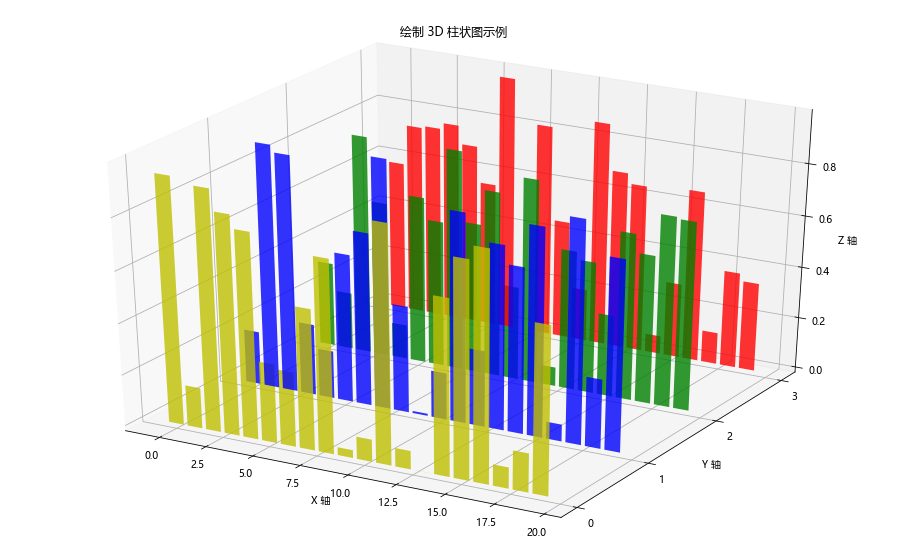

In [120]:
#https://www.itrhx.com/2020/06/08/A77-Matplotlib-10/
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

# 获取 figure 画布并通过子图创建 Axes3D 对象
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]

# 设置3D柱状图数据并绘制图像
for c, k in zip(colors, yticks):
    print(k)
    xs = np.arange(20)
    ys = np.random.rand(20)
    cs = [c] * len(xs)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

# 设置图像标题、坐标标签以及范围
ax.set_title('绘制 3D 柱状图示例', pad=15, fontsize='12')
ax.set_xlabel('X 轴')
ax.set_ylabel('Y 轴')
ax.set_zlabel('Z 轴')
ax.set_yticks(yticks)

plt.show()

In [46]:
#https://matplotlib.org/3.1.1/tutorials/toolkits/mplot3d.html
ys = np.random.rand(20)
ys

array([0.27141981, 0.80872605, 0.0545299 , 0.87532817, 0.63646051,
       0.47080763, 0.35282581, 0.64769715, 0.22816893, 0.48288333,
       0.67379882, 0.09926412, 0.73153888, 0.20018051, 0.79134161,
       0.91730671, 0.66053045, 0.20531932, 0.26058616, 0.01623361])

In [41]:
xs = np.arange(20)
xs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [38]:
xs = [int(OneKey) for OneKey in Hour_Weekday_TF_Distribution.keys()]
xs

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [44]:
import numpy

xs = numpy.array(xs)
xs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [ ]:
#https://www.itrhx.com/2020/06/08/A77-Matplotlib-10/

In [49]:
Hour_Weekday_TF_Distribution

{'0': {'Tue': 567,
  'Sat': 1235,
  'Mon': 607,
  'Fri': 2117,
  'Wed': 786,
  'Sun': 963,
  'Thu': 824},
 '1': {'Fri': 1015,
  'Tue': 455,
  'Thu': 629,
  'Sat': 1235,
  'Sun': 757,
  'Mon': 547,
  'Wed': 528},
 '2': {'Fri': 557,
  'Sat': 1105,
  'Thu': 528,
  'Sun': 676,
  'Mon': 407,
  'Tue': 374,
  'Wed': 375},
 '3': {'Sat': 1007,
  'Tue': 317,
  'Sun': 654,
  'Thu': 470,
  'Fri': 477,
  'Mon': 393,
  'Wed': 312},
 '4': {'Sat': 1513,
  'Tue': 422,
  'Thu': 689,
  'Fri': 657,
  'Sun': 898,
  'Mon': 578,
  'Wed': 503},
 '5': {'Mon': 1180,
  'Tue': 932,
  'Sat': 3115,
  'Fri': 1342,
  'Sun': 1871,
  'Wed': 1040,
  'Thu': 1373},
 '6': {'Wed': 1998,
  'Thu': 2948,
  'Sun': 4473,
  'Mon': 3197,
  'Sat': 7896,
  'Tue': 2217,
  'Fri': 3204},
 '7': {'Tue': 4699,
  'Wed': 4404,
  'Sat': 15062,
  'Sun': 8583,
  'Fri': 6112,
  'Mon': 6235,
  'Thu': 4645},
 '8': {'Tue': 5840,
  'Fri': 6953,
  'Sat': 13701,
  'Sun': 11259,
  'Mon': 6843,
  'Wed': 6035,
  'Thu': 5716},
 '9': {'Tue': 6512,
  'Sun'

In [55]:
yticks = ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun']
ys = [Hour_Weekday_TF_Distribution['0'][OneWeekday] for OneWeekday in yticks]
ys = np.array(ys)
ys

array([ 607,  567,  786,  824, 2117, 1235,  963])

In [65]:
Hour_Weekday_TF_Distribution.keys()
#Hour_Weekday_TF_Distribution.keys().sort_values

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'])

In [75]:
Hour_Weekday_TF_Distribution.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'])

In [79]:
yticks = ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun']
for OneHour in Hour_Weekday_TF_Distribution.keys():
    xs = np.array([OneHour] * len(yticks))
    print(xs)


['0' '0' '0' '0' '0' '0' '0']
['1' '1' '1' '1' '1' '1' '1']
['2' '2' '2' '2' '2' '2' '2']
['3' '3' '3' '3' '3' '3' '3']
['4' '4' '4' '4' '4' '4' '4']
['5' '5' '5' '5' '5' '5' '5']
['6' '6' '6' '6' '6' '6' '6']
['7' '7' '7' '7' '7' '7' '7']
['8' '8' '8' '8' '8' '8' '8']
['9' '9' '9' '9' '9' '9' '9']
['10' '10' '10' '10' '10' '10' '10']
['11' '11' '11' '11' '11' '11' '11']
['12' '12' '12' '12' '12' '12' '12']
['13' '13' '13' '13' '13' '13' '13']
['14' '14' '14' '14' '14' '14' '14']
['15' '15' '15' '15' '15' '15' '15']
['16' '16' '16' '16' '16' '16' '16']
['17' '17' '17' '17' '17' '17' '17']
['18' '18' '18' '18' '18' '18' '18']
['19' '19' '19' '19' '19' '19' '19']
['20' '20' '20' '20' '20' '20' '20']
['21' '21' '21' '21' '21' '21' '21']
['22' '22' '22' '22' '22' '22' '22']
['23' '23' '23' '23' '23' '23' '23']


In [115]:
xs = [ int(OneHour) for OneHour in Hour_Weekday_TF_Distribution.keys()]
print(xs)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [116]:
xs = np.array([ int(OneHour) for OneHour in Hour_Weekday_TF_Distribution.keys()])
print(xs)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [104]:
for OneHour in Hour_Weekday_TF_Distribution.keys():
    ys = np.array([Hour_Weekday_TF_Distribution[OneHour][OneWeekday] for OneWeekday in yticks])
    print(ys)

[ 607  567  786  824 2117 1235  963]
[ 547  455  528  629 1015 1235  757]
[ 407  374  375  528  557 1105  676]
[ 393  317  312  470  477 1007  654]
[ 578  422  503  689  657 1513  898]
[1180  932 1040 1373 1342 3115 1871]
[3197 2217 1998 2948 3204 7896 4473]
[ 6235  4699  4404  4645  6112 15062  8583]
[ 6843  5840  6035  5716  6953 13701 11259]
[ 7405  6512  6669  6436  7777  5685 11005]
[ 8219  7104  7144  7070  8311  4117 10526]
[ 7952  6642  6594  7067  8848 10204 10181]
[ 6310  5332  5380  5790  7798 14989  8146]
[ 6603  5228  5047  5313  7963 14393  8996]
[ 6146  5345  4714  4884  8608 13010 10088]
[ 6476  5407  4625  4880  8820 11709 11548]
[ 6250  5321  4665  4859  7883 10388 10485]
[4369 3808 3461 3540 2559 7334 8047]
[3555 3331 3229 3445 3939 6206 6330]
[2782 2616 2445 2619 7588 4987 6224]
[2435 2160 2215 2461 9223 4672 6549]
[2011 1859 1913 2066 8959 4026 4813]
[1341 1342 1500 1687 6066 2653 2648]
[ 859  815 1083 1142 3629 1746 1494]


In [119]:
for c, k in zip(colors, yticks):
    print(c,k)
    ys = np.array([Hour_Weekday_TF_Distribution[OneHour][k] for OneHour in Hour_Weekday_TF_Distribution.keys()])
    print(ys)

b Mon
[ 607  547  407  393  578 1180 3197 6235 6843 7405 8219 7952 6310 6603
 6146 6476 6250 4369 3555 2782 2435 2011 1341  859]
g Tue
[ 567  455  374  317  422  932 2217 4699 5840 6512 7104 6642 5332 5228
 5345 5407 5321 3808 3331 2616 2160 1859 1342  815]
r Wed
[ 786  528  375  312  503 1040 1998 4404 6035 6669 7144 6594 5380 5047
 4714 4625 4665 3461 3229 2445 2215 1913 1500 1083]
c Thu
[ 824  629  528  470  689 1373 2948 4645 5716 6436 7070 7067 5790 5313
 4884 4880 4859 3540 3445 2619 2461 2066 1687 1142]
m Fri
[2117 1015  557  477  657 1342 3204 6112 6953 7777 8311 8848 7798 7963
 8608 8820 7883 2559 3939 7588 9223 8959 6066 3629]
y Sat
[ 1235  1235  1105  1007  1513  3115  7896 15062 13701  5685  4117 10204
 14989 14393 13010 11709 10388  7334  6206  4987  4672  4026  2653  1746]
k Sun
[  963   757   676   654   898  1871  4473  8583 11259 11005 10526 10181
  8146  8996 10088 11548 10485  8047  6330  6224  6549  4813  2648  1494]


['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23']
b 1
[ 50  46  36  39  48 164 382 717 738 823 886 769 676 704 691 697 773 624
 400 285 259 226 146  93]
['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']
g 2
[ 58  45  30  25  40 102 244 549 658 697 753 799 615 662 601 633 665 554
 362 242 204 147 140  92]
['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g']
r 3
[ 70  45  33  30  47 127 216 542 621 738 812 759 641 563 561 589 593 498
 332 236 202 188 155 110]
['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r']
c 4
[ 74  55  45  47  73 168 366 564 651 698 777 737 630 585 571 615 596 543
 403 264 232 194 141 115]
['c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', '

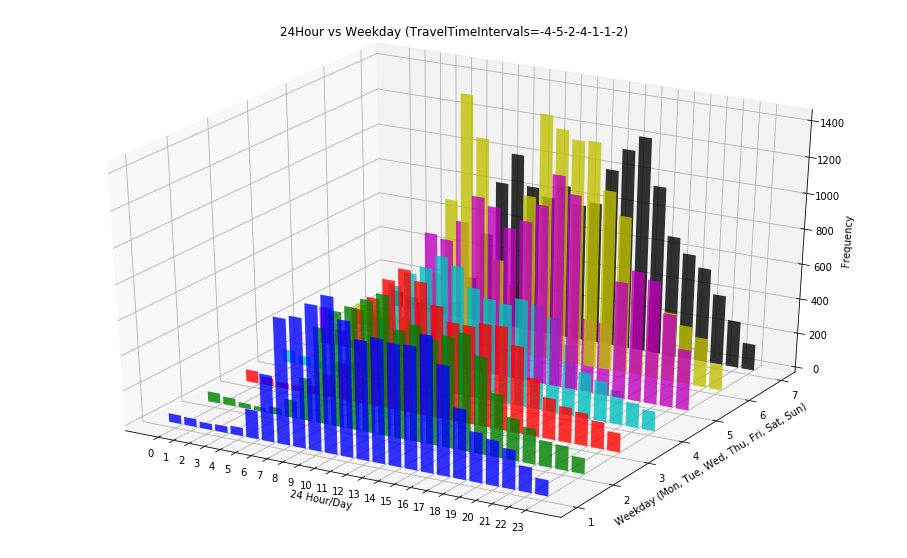

In [15]:
#https://www.itrhx.com/2020/06/08/A77-Matplotlib-10/
import matplotlib.pyplot as plt
import numpy as np

#plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

# 获取 figure 画布并通过子图创建 Axes3D 对象
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')

#colors = ['r', 'g', 'b', 'y']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
yticks = [1,2,3,4,5,6,7]
yticks_map = ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun']

# 设置3D柱状图数据并绘制图像
xs = np.array([ OneHour for OneHour in Hour_Weekday_TF_Distribution.keys()])
print(xs)
for c, k in zip(colors, yticks):
    print(c,k)
    ys = np.array([Hour_Weekday_TF_Distribution[OneHour][yticks_map[k-1]] for OneHour in Hour_Weekday_TF_Distribution.keys()])
    print(ys)
    cs = [c] * len(xs)   
    print(cs)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)
    
# 设置图像标题、坐标标签以及范围
ax.set_title('24Hour vs Weekday (TravelTimeIntervals='+TargetValue+')', pad=15, fontsize='12')
ax.set_xlabel('24 Hour/Day')
ax.set_ylabel('Weekday (Mon, Tue, Wed, Thu, Fri, Sat, Sun)')
ax.set_zlabel('Frequency')
#ax.set_yticks(yticks)

plt.show()